Model Building

Importing The Required Model Building Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Traning Datagenarator

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

Testing Datagenarator

In [4]:
test_datagen = ImageDataGenerator(rescale=1/255)

Training Dataset

In [5]:
x_train = train_datagen.flow_from_directory( 'C:\\Users\\hp\\Desktop\\Project\\training_set' , target_size=(64,64),batch_size=300,class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


Testing Dataset

In [6]:
x_test = test_datagen.flow_from_directory("C:\\Users\\hp\\Desktop\\Project\\test_set", target_size=(64,64),batch_size=300, class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [7]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  53
Len x-test :  8


In [8]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [9]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Model Creation

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [11]:
model=Sequential()

Add the convolution layer

In [12]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

Add the pooling layer

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add the flatten layer

In [14]:
model.add(Flatten())

Adding the dense layer

In [15]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

Compile the Model

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [21]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


C:\Users\hp\AppData\Local\Temp\ipykernel_8460\3682521968.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 123s 4s/step - loss: 0.7193 - accuracy: 0.7564 - val_loss: 0.3789 - val_accuracy: 0.9044
Epoch 2/10
30/30 [==============================] - 97s 3s/step - loss: 0.1549 - accuracy: 0.9532
Epoch 3/10
30/30 [==============================] - 95s 3s/step - loss: 0.0821 - accuracy: 0.9767
Epoch 4/10
30/30 [==============================] - 87s 3s/step - loss: 0.0463 - accuracy: 0.9870
Epoch 5/10
30/30 [==============================] - 88s 3s/step - loss: 0.0261 - accuracy: 0.9930
Epoch 6/10
30/30 [==============================] - 88s 3s/step - loss: 0.0232 - accuracy: 0.9938
Epoch 7/10
30/30 [==============================] - 87s 3s/step - loss: 0.0185 - accuracy: 0.9953
Epoch 8/10
30/30 [==============================] - 86s 3s/step - loss: 0.0234 - accuracy: 0.9929
Epoch 9/10
30/30 [==============================] - 86s 3s/step - loss: 0.0139 - accuracy: 0.9964
Epoch 10/10
30/30 [==============================] - 103s 3s/step - loss: 0

Save the model

In [22]:
model.save('aslpng1.h5')

Test the Model

Import the packages and load the saved model

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [3]:
model = load_model('aslpng1.h5')

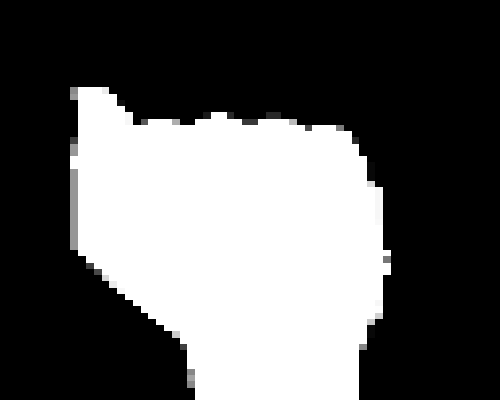

In [4]:
img=image.load_img('C:\\Users\\hp\\Desktop\\Project\\test_set\\A\\11.png',target_size=(400,500))
img